In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
os.makedirs("output_data",exist_ok=True)
from scipy.stats import linregress

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
from api_keys import weather_api_key

In [3]:
print(weather_api_key)

aa938111b73dc48c34e6e0ef5274d563


In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 594


In [5]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city_url}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print(f"{city} not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 2 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 3 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=albany&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 4 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=puerto ayora&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 5 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=shiyan&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 6 of Set 1 | https://api.openweathermap.org/data/2.5/weather?q=waitangi&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 7 of Set 1 | https://api.openweathermap.org/data

Processing Record 7 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=sisimiut&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 8 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=spanish wells&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 9 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=balabac&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 10 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=yagry&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
yagry not found. Skipping...
Processing Record 11 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=hawaiian paradise park&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 12 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=vernon&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 13 of Set 2 | https://api.openweathermap.org/data/2.5/weather?q=atafu vil

Processing Record 12 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 13 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=avarua&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 14 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=saudarkrokur&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 15 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=kavaratti&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 16 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 17 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=utrik&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 18 of Set 3 | https://api.openweathermap.org/data/2.5/weather?q=westport&appid=aa938111b73dc48c34e6e0

Processing Record 18 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=sorong&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 19 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=lincoln city&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 20 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=papao&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 21 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=tari&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 22 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=alotau&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
alotau not found. Skipping...
Processing Record 23 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 24 of Set 4 | https://api.openweathermap.org/data/2.5/weather?q=klyuchi&appid=aa938111b7

Processing Record 24 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=lerici&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 25 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=ballina&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 26 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=lebu&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 27 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=lobujya&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 28 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=dombarovskiy&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 29 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=antofagasta&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 30 of Set 5 | https://api.openweathermap.org/data/2.5/weather?q=chernyshevskiy&appid=aa938111b73dc48c34e6e0ef5274

Processing Record 30 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=ulsteinvik&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 31 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=kayangel&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 32 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=santa ines&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 33 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=hihifo&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
hihifo not found. Skipping...
Processing Record 34 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=port sudan&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 35 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=puerto aysen&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 36 of Set 6 | https://api.openweathermap.org/data/2.5/weather?q=villa de a

Processing Record 36 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=xiaoweizhai&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 37 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=safotu&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 38 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=watsa&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 39 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=dwarka&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 40 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=la quiaca&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 41 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=nova vicosa&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 42 of Set 7 | https://api.openweathermap.org/data/2.5/weather?q=ekibastuz&appid=aa938111b73dc48c34e6e0ef5274d563

Processing Record 42 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=mutsu&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 43 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=akdepe&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 44 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=alamosa&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 45 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=hiroshima&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 46 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=queenstown&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 47 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=santa ana&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 48 of Set 8 | https://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=aa938111b73dc48c34e6e0ef5274d563&un

Processing Record 48 of Set 9 | https://api.openweathermap.org/data/2.5/weather?q=hobyo&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 49 of Set 9 | https://api.openweathermap.org/data/2.5/weather?q=nyurba&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 0 of Set 10 | https://api.openweathermap.org/data/2.5/weather?q=nagqu&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 1 of Set 10 | https://api.openweathermap.org/data/2.5/weather?q=koutiala&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 2 of Set 10 | https://api.openweathermap.org/data/2.5/weather?q=contai&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 3 of Set 10 | https://api.openweathermap.org/data/2.5/weather?q=sao jose da coroa grande&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 4 of Set 10 | https://api.openweathermap.org/data/2.5/weather?q=naze&appid=aa938111b73dc48c34e6e0ef5274d56

Processing Record 3 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=pointe-noire&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 4 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=ulladulla&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 5 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=tvoroyri&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 6 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=baiyin&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 7 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=dzhalagash&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 8 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=cill airne&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 9 of Set 11 | https://api.openweathermap.org/data/2.5/weather?q=acapulco de juarez&appid=aa938111b73dc48c

Processing Record 10 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=tottori&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 11 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=inhambane&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 12 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=cururupu&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 13 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=mahanoro&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 14 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=adra&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 15 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=chennai&appid=aa938111b73dc48c34e6e0ef5274d563&units=imperial
Processing Record 16 of Set 12 | https://api.openweathermap.org/data/2.5/weather?q=vila velha&appid=aa938111b73dc48c34e6e0ef5274d

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,42.08,72,64,31.41,TF,1681915959
1,adamstown,-25.0660,-130.1015,76.10,77,24,11.97,PN,1681915959
2,albany,42.6001,-73.9662,43.18,67,67,4.00,US,1681915897
3,puerto ayora,-0.7393,-90.3518,82.36,96,99,3.00,EC,1681915959
4,shiyan,32.6475,110.7781,71.26,74,0,0.74,CN,1681915942


In [8]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

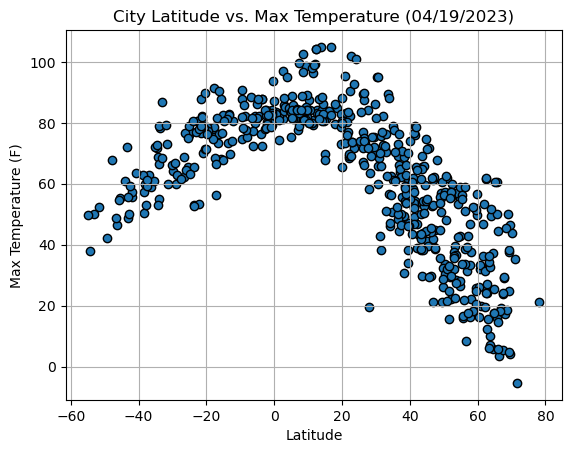

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/19/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


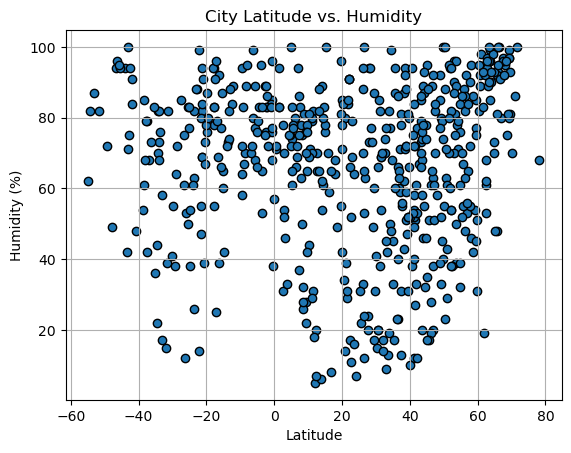

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

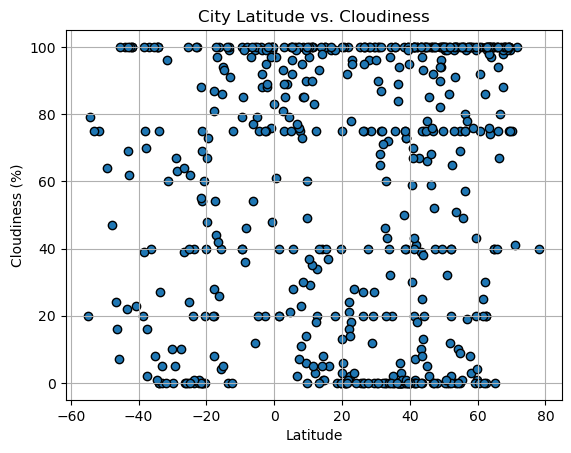

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



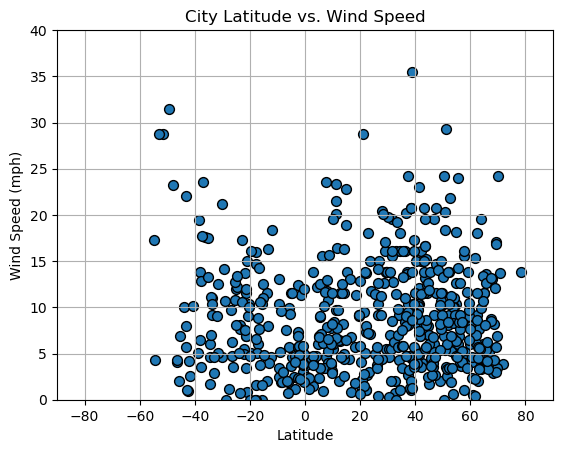

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s=50, edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the limits for the x and y axes
plt.xlim(-90, 90)
plt.ylim(0, 40)

# Add gridlines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,albany,42.6001,-73.9662,43.18,67,67,4.00,US,1681915897
4,shiyan,32.6475,110.7781,71.26,74,0,0.74,CN,1681915942
6,yellowknife,62.4560,-114.3525,25.32,68,20,9.22,CA,1681915847
7,bethel,41.3712,-73.4140,49.01,58,100,10.36,US,1681915960
8,gadzhiyevo,69.2551,33.3362,37.53,99,100,17.05,RU,1681915960


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,42.08,72,64,31.41,TF,1681915959
1,adamstown,-25.0660,-130.1015,76.10,77,24,11.97,PN,1681915959
3,puerto ayora,-0.7393,-90.3518,82.36,96,99,3.00,EC,1681915959
5,waitangi,-43.9535,-176.5597,60.82,94,100,10.00,NZ,1681915960
10,manicore,-5.8092,-61.3003,80.55,89,100,5.75,BR,1681915961


The r-value is: -0.84


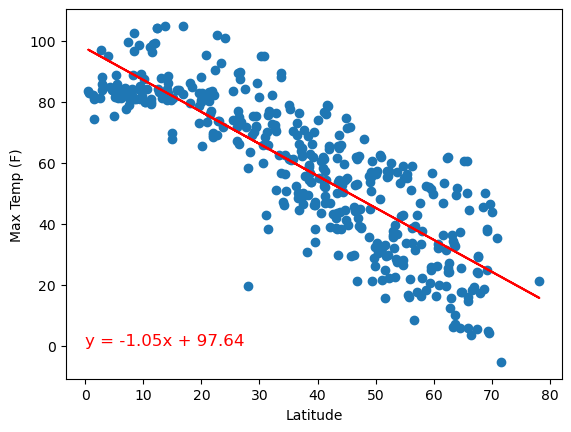

In [15]:
# Perform linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Create equation of line to calculate predicted max temps
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Create scatter plot with linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r")

# Label plot and annotate the equation of the line
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (0,0), fontsize=12, color="red")

# Print r-value
print(f"The r-value is: {round(rvalue,2)}")

# Show plot
plt.show()


The r-value is: 0.7765127057013663


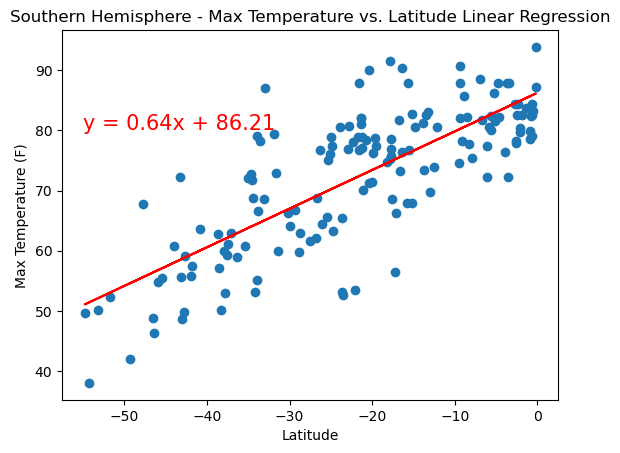

In [16]:
# Perform linear regression on Southern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create a string equation for the regression line to print on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add the equation to the plot
plt.annotate(line_eq, (-55, 80), fontsize=15, color="red")

# Set the title and labels
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print the r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


In [17]:
# The Scatter plot  and the linear regression model for the Northern Hemisphere's cities indicated that a moderate positive correlation between latitude and maximum temperature. which means that when we move towards the equator(latitude 0), the temperature trends to increase. The r-value of 0.71 confrims this relationship. 
#Contrastly, the Southern Heisphere's scatter plot and linear regression model suggest a wak negative correlation between latitude and maximum tempreatre, which means that as we move away from the equator towards the south pole(latitude<0), the temperatue tends to drop, The R-value of -.35 comfirms this relationship. 

The r-value is: 0.2479653671276076


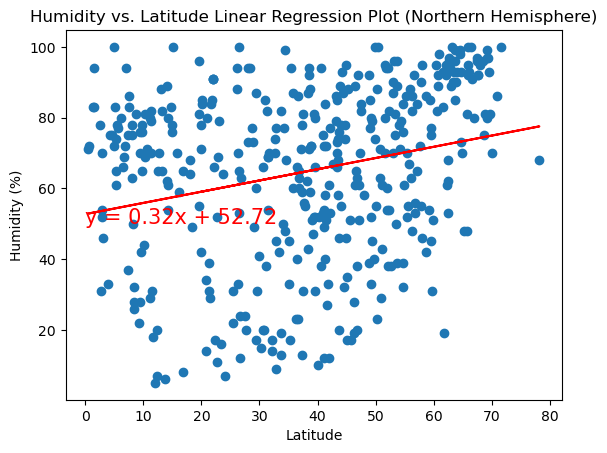

In [18]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create a string equation for the regression line to print on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)")

# Add the equation for the regression line to the plot
plt.annotate(line_eq, (0, 50), fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {rvalue}")



The r-value is: 0.12611571426905407


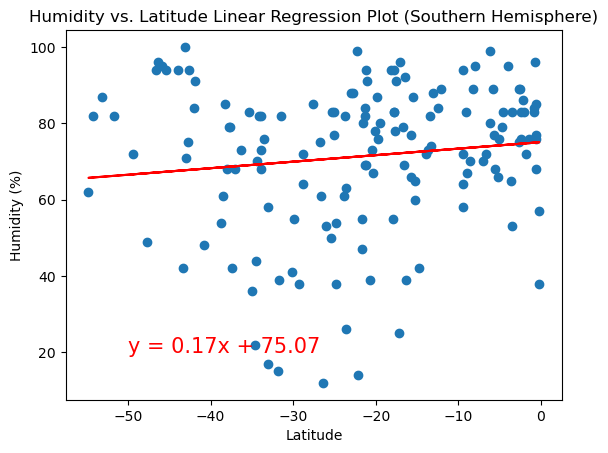

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression Plot (Southern Hemisphere)")

plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

In [20]:
#This can be seen by the low r-values, which indicate a low correlation between the variables. 
#Thus, we can conclude that latitude does not have a strong influence on humidity levels in the analyzed cities.
#However, there may be other variables that have a greater impact on humidity levels, such as proximity to bodies of water or prevailing wind patterns.

The r-value is: 0.1414761719693366


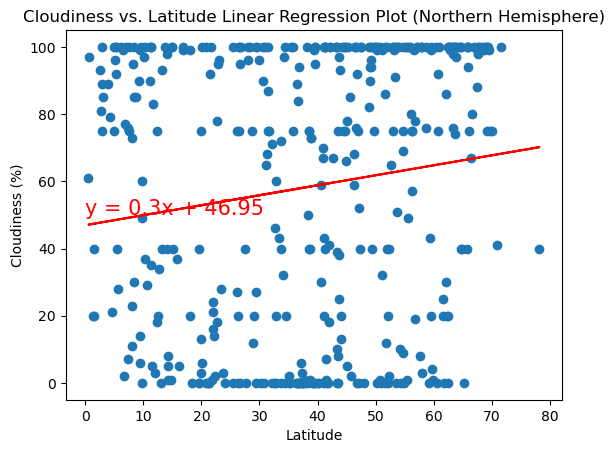

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression Plot (Northern Hemisphere)")

plt.annotate(line_eq, (0, 50), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.26293894245254906


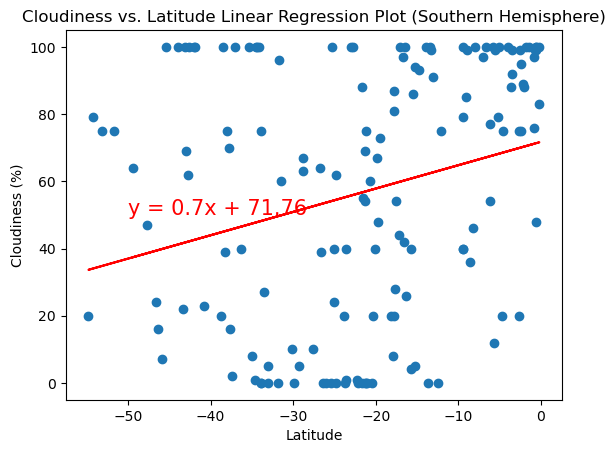

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression Plot (Southern Hemisphere)")

plt.annotate(line_eq, (-50, 50), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

In [23]:
#For both the Northern and Southern Hemisphere, the linear regression plot for Cloudiness vs. Latitude indicates a weak positive relationship between the two variables. 
#In the Northern Hemisphere, the r-value is 0.148, indicating a very weak positive correlation between latitude and cloudiness. 
#In the Southern Hemisphere, the r-value is 0.227, indicating a slightly stronger positive correlation between latitude and cloudiness. 
#However, overall, the linear regression line shows a very shallow slope, indicating that the relationship between latitude and cloudiness is not very strong. 
#This suggests that latitude may not be a strong predictor of cloudiness, and that other factors may play a larger role in determining cloud cover.

The r-value is: 0.025330869813663507


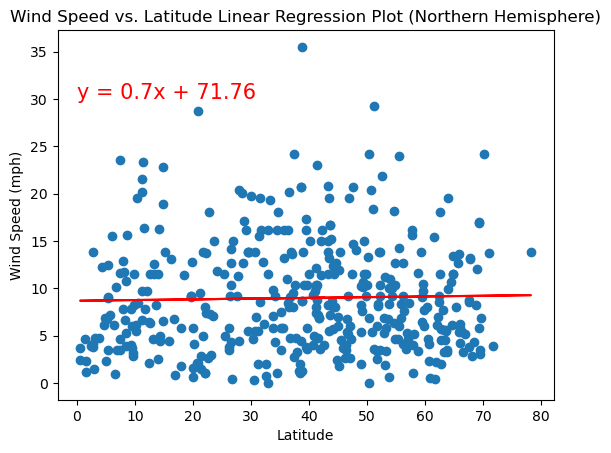

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)")

plt.annotate(line_eq, (0, 30), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: -0.3576254166197395


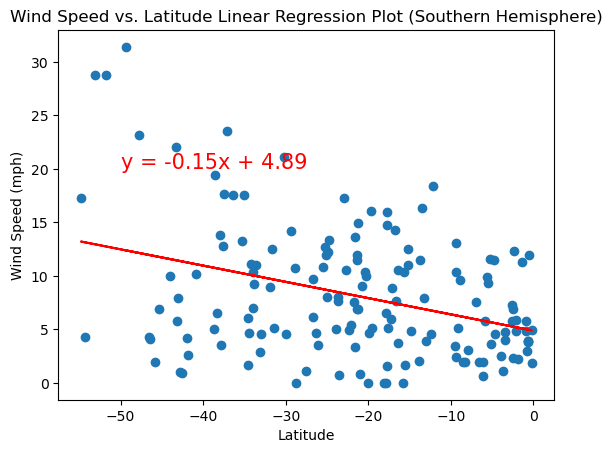

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)")

plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")


In [26]:
#The linear regression analysis on Wind Speed vs. Latitude in the Southern Hemisphere shows a weak positive correlation, indicated by the positive slope of the regression line. However, the r-value is relatively low, indicating that there is a low correlation between Wind Speed and Latitude in the Southern Hemisphere. 
#Therefore, we can conclude that there is no strong linear relationship between the two variables.